<a href="https://colab.research.google.com/github/ShoSato-047/STAT380/blob/main/STAT380_4_3_(2025)_logistic_model_assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In this notebook we discuss how to assess the logistic model for quality of fit.  We want to check:

* The log-odds of $Y=1$ are linearly related with $X$
* The binomial model fits well

# Linearity of log-odds


Reconsider the lobster data:

In [1]:
library(dplyr)
lobsters <- read.csv('https://www.dropbox.com/s/kw3px03a6t3s1x3/lobsters.csv?dl=1')
head(lobsters)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




,length.mm,size,survival
,<int>,<chr>,<int>
1,27,small,0
2,27,small,0
3,27,small,0
4,27,small,0
5,27,small,0
6,30,small,0


Consider modeling the relationship between $X_i$ = length (in mm) and survival:

$$\log\left(\frac{p_i}{1-p_i}\right) = \beta_0 + \beta_1 X_i$$


In [2]:
logistic.length.fit  <- glm(survival~length.mm, data = lobsters, family=binomial)
summary(logistic.length.fit)


Call:
glm(formula = survival ~ length.mm, family = binomial, data = lobsters)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -7.89597    1.38501  -5.701 1.19e-08 ***
length.mm    0.19586    0.03415   5.735 9.77e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 220.41  on 158  degrees of freedom
Residual deviance: 172.87  on 157  degrees of freedom
AIC: 176.87

Number of Fisher Scoring iterations: 4


By fitting this model, we are assuming the log-odds of survival are linearly related to length.  Since the lengths are grouped into 3-mm brackets, we can find the estimated log-odds of survival in each age bracket and plot vs $X_i$ to determine whether this assumption appears justified.

Finding the logits:

In [3]:
logits <- lobsters %>%
  group_by(length.mm) %>%
    summarize(p = sum(survival==1)/n()) %>%
    mutate(logit = log(p/(1-p)))

In [4]:
logits

length.mm,p,logit
<int>,<dbl>,<dbl>
27,0.0000000,-Inf
30,0.1000000,-2.1972246
33,0.1363636,-1.8458267
36,0.3333333,-0.6931472
39,0.5454545,0.1823216
42,0.5862069,0.3483067
45,0.7222222,0.9555114
48,0.7058824,0.8754687
51,0.8750000,1.9459101


Note that $logit(p)$ is infinite (or minus infinite) for $p=0$ or $p=1$; these will have to be omitted in our plotting.

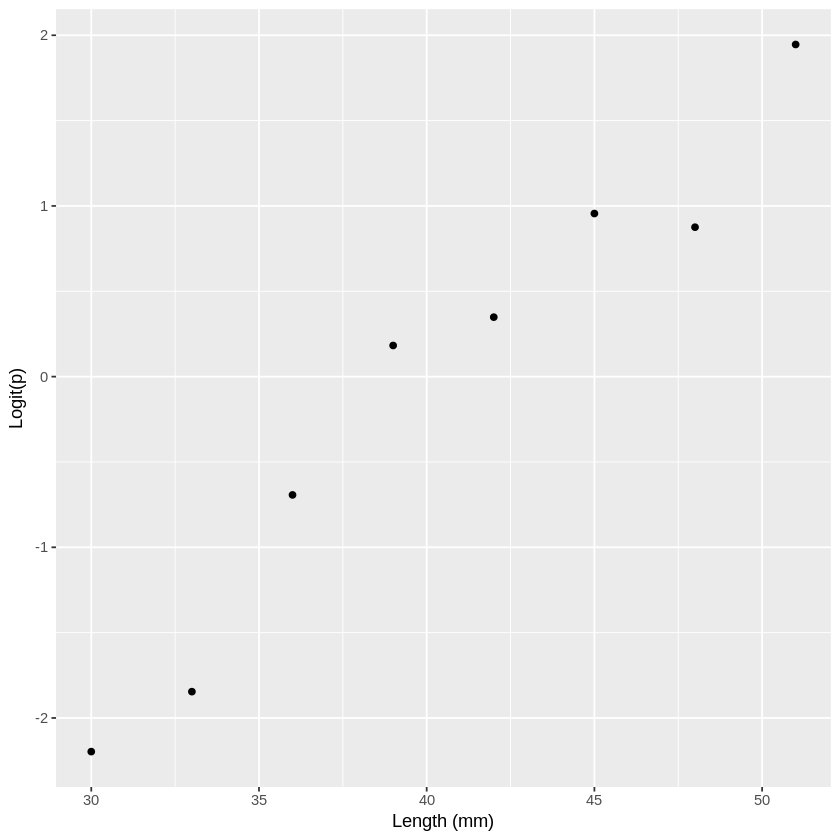

In [7]:
library(ggplot2)
ggplot(data = logits %>% filter(p >0 & p < 1)) + # filter out the infiite logit
  geom_point(aes(x = length.mm, y = logit)) +
  ylab('Logit(p)') + xlab('Length (mm)')

A linear relationship between $X$ (length) and $logit(p)$ appears to be satisfactory.  

# Quality of model fit

In ordinary regression, you computed an $R^2$ metric that measured how well the model variables explained the response $Y$.  For GLMs, some analogous metrics are the ***deviances***.  Deviances are differences in log-likelihoods between three different models:

* A null model (no $X$ terms) -- intercept only
* The fitted model
* A fully saturated model


## Null model

A null model is an "intercept-only" model that does not fit a relationship of $Y$ with $X$.  We can fit this model and obtain the log-likelihood as follows:

In [8]:
null.model <- glm(survival ~ 1, data = lobsters, family=binomial)
(ll_null <- logLik(null.model))

'log Lik.' -110.2073 (df=1)

In [9]:
summary(null.model)


Call:
glm(formula = survival ~ 1, family = binomial, data = lobsters)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)
(Intercept) -0.01258    0.15861  -0.079    0.937

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 220.41  on 158  degrees of freedom
Residual deviance: 220.41  on 158  degrees of freedom
AIC: 222.41

Number of Fisher Scoring iterations: 3


## Fully saturated model (as many n values)

In this model, every observation has its own parameter.  This allows for "perfect fitting", and is a GLM analog to a regression model where every observation is perfectly predicted.

In other words, we fit the model:

$$logit(p) = \beta_0 + \beta_1 U_{2} + \beta_2U_{3} + ... + \beta_n U_{n}$$

$$U_2 = 1 \mbox{ for the 2nd observation}; 0 \mbox{ otherwise}$$
$$U_3 = 1 \mbox{ for the 3rd observation}; 0 \mbox{ otherwise}$$
$$\vdots$$
$$U_n = 1 \mbox{ for the nth observation}; 0 \mbox{ otherwise}$$

In [10]:
nrow(lobsters)

[1] 159

In [11]:
saturated.model <- glm(survival ~ factor(1:159), data = lobsters, family=binomial)

Warning message:
“glm.fit: algorithm did not converge”


In [12]:
head(model.matrix(saturated.model))

,(Intercept),factor(1:159)2,factor(1:159)3,factor(1:159)4,factor(1:159)5,factor(1:159)6,factor(1:159)7,factor(1:159)8,factor(1:159)9,factor(1:159)10,⋯,factor(1:159)150,factor(1:159)151,factor(1:159)152,factor(1:159)153,factor(1:159)154,factor(1:159)155,factor(1:159)156,factor(1:159)157,factor(1:159)158,factor(1:159)159
1,1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [13]:
summary(saturated.model)


Call:
glm(formula = survival ~ factor(1:159), family = binomial, data = lobsters)

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)
(Intercept)      -2.657e+01  3.561e+05       0        1
factor(1:159)2   -1.051e-13  5.036e+05       0        1
factor(1:159)3   -6.881e-14  5.036e+05       0        1
factor(1:159)4   -3.840e-14  5.036e+05       0        1
factor(1:159)5   -1.080e-13  5.036e+05       0        1
factor(1:159)6   -6.169e-14  5.036e+05       0        1
factor(1:159)7   -2.590e-14  5.036e+05       0        1
factor(1:159)8   -1.983e-15  5.036e+05       0        1
factor(1:159)9   -4.873e-14  5.036e+05       0        1
factor(1:159)10  -4.496e-14  5.036e+05       0        1
factor(1:159)11  -7.480e-14  5.036e+05       0        1
factor(1:159)12   2.190e-14  5.036e+05       0        1
factor(1:159)13  -4.672e-14  5.036e+05       0        1
factor(1:159)14   6.886e-15  5.036e+05       0        1
factor(1:159)15   5.313e+01  5.036e+05       0        1
factor

In [14]:
(ll_saturated <- logLik(saturated.model))

'log Lik.' -4.611991e-10 (df=159)

## Our model

Our fit using length to model survival is "in between" the overly-simplistic null model, and the drastically over-fit saturated model:

In [15]:
(ll_proposed <- logLik(logistic.length.fit))

'log Lik.' -86.4357 (df=2)

## **Deviances**


So, we have 3 log-likelihoods:

* $logLik_{saturated}$ basically measures "how good can it get?"
* $logLik_{null}$ basically measures "how bad can it get?"
* $logLik_{proposed\ model}$ is in between.


***Deviances*** measure gaps between these log-likelihoods.  Specificially:



$$ Null\ Deviance = 2\cdot\left(logLik_{saturated}-logLik_{null}\right)$$


$$ Residual\ Deviance = 2\cdot \left(logLik_{saturated} - logLik_{proposed\ model}\right)$$


The diagram [from this blog post](https://rpubs.com/fhernanb/deviance_glm#:~:text=Deviance%20is%20a%20measure%20of,used%20for%20statistical%20hypothesis%20testing.) is helpful for understanding what's going on (*ll* stands for "log likelihood"):




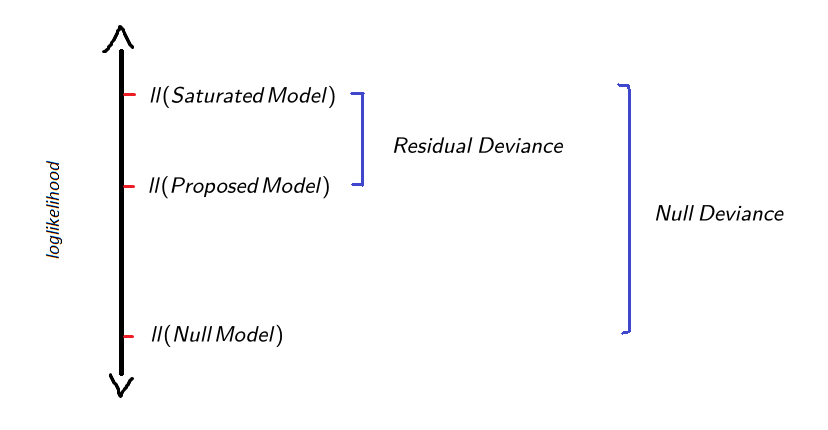

So:

* Null deviance measures the difference between "how good it can get" and "how bad it can get"
* Residual deviance measures how much the proposed model cuts down on that gap.
* Fun facts: with ordinary linear regression (a normal likelihood);
  - Null deviance is equivalent to total sum of squares $\sum_{i=1}^n (Y_i - \bar Y)^2$
  - Residual deviance is equivalent to sum-of-squared residuals $\sum_{i=1}^n (Y_i - \hat Y_i)^2$
  - So $R^2= 1-\frac{residual\ deviance}{null\ deviance}$

Recall our three model log-likelihoods:

In [16]:
ll_null
ll_saturated
ll_proposed

'log Lik.' -110.2073 (df=1)

'log Lik.' -4.611991e-10 (df=159)

'log Lik.' -86.4357 (df=2)

Note the deviances in the summary output:

In [17]:
summary(logistic.length.fit)


Call:
glm(formula = survival ~ length.mm, family = binomial, data = lobsters)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -7.89597    1.38501  -5.701 1.19e-08 ***
length.mm    0.19586    0.03415   5.735 9.77e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 220.41  on 158  degrees of freedom
Residual deviance: 172.87  on 157  degrees of freedom
AIC: 176.87

Number of Fisher Scoring iterations: 4


We have:

* Null deviance = 220.41
* Residual deviance = 172.87

Verify computation of these deviances.

In [23]:
# Null deviances
(ll_saturated - ll_null) *2

'log Lik.' 220.4145 (df=159)

In [24]:
# Residual deviance
(ll_saturated - ll_proposed) *2

'log Lik.' 172.8714 (df=159)

## Deviances and goodness-of-fit tests

**If the model is fitting well, the residual deviance will be approximately equal to the residual degrees of freedom $n-p$.**  Residual deviances that are much larger than the df indicate lack of model fit.  Lack of fit can be due to:

* Missing important covariates, i.e. the covariates you included don't improve the model much beyond a null intercept-only model
  - Possible fix: Investigate including additional covariates, or modeling interactions if you haven't yet.
* A non-linear relationship between the log-odds and the covariates
  - Possible fix: include polynomial $X$ terms or other nonlinear $X$ relationships
* Extra-binomial variance -- $Var(Y|X)$ larger than $p_X(1-p_X)$.
  - Possible "fix": robust sandwich standard errors

For out fit, our residual deviance of 172.87 is in the same ballpark as the df = 157, demonstrating pretty good fit.

We can also perform a ***goodness-of-fit*** test to help assess lack-of-fit.  In this scenario, we test:


$$H_0: \mbox{the model fits well.}$$
$$H_a: \mbox{the model does not fit well.}$$



We test these hypotheses by comparing the residual deviance to a $\chi^2_{n-p}$ distrbution.  Small p-values indicate evidence for lack-of-fit, i.e., too-large residual deviances.



Carrying out the goodness-of-fit test for our lobster length model:

In [25]:
1-pchisq(172.87, df = 157)

[1] 0.1828892

Since the p-value > 0.05, there is no statistical evidence supporting a lack of fit.


# Using deviances to compare models

While deviances are of some use when investigating a single model, they are *very* useful for comparing large to smaller, nested models.  This is known as a ***drop-in-deviance test for comparing nested models.***  It compares two models of the form:

$$\mbox{Simple model:  } logit(p) = \beta_0 + \beta_1 X_1 + ... + \beta_p X_p$$

$$\mbox{Larger model:  } logit(p) = \mbox{all simple model terms} + \beta_{p+1}X_{p+1} + ... + \beta_{p+k}X_{p+k}$$


  Formally the drop-in-deviance test is a test of:


$$H_0: \mbox{the simple model is sufficient;  }\beta_{p+1}=...=\beta_{p+k} = 0$$
$$H_0: \mbox{the larger model is necessary;  at least one of }\beta_{p+1},...,\beta_{p+k} \ne 0$$



To carry out the test ("*deviance*" refers to residual deviance):

* Find $deviance_{simple}$
*  Find $deviance_{larger}$
* Find drop-in-deviances $deviance_{larger}-deviance_{simple}$
* Compare to a $\chi^2$ with df equal to difference in number of parameters

But note!

 $$deviance_{larger}-deviance_{simple} = 2\cdot(logLik(saturated)-logLik(larger)) - 2\cdot(logLik(saturated)-logLik(simple))$$
 $$ = -2\cdot(logLik(larger)-logLik(simple))$$

 So the ***drop-in-deviance test*** is exactly equivalent to the **likelihood ratio test** for comparing two models!

## R syntax

Given a `model.large` and a `model.simple`, cary out the drop-in-deviance aka likelihood ratio test as follows:

`anova(model.simple, model.large, test = 'Chisq')`

## Example: quadratic vs linear lobster fits

Recall our plot of the empirical logits vs the length brackets:

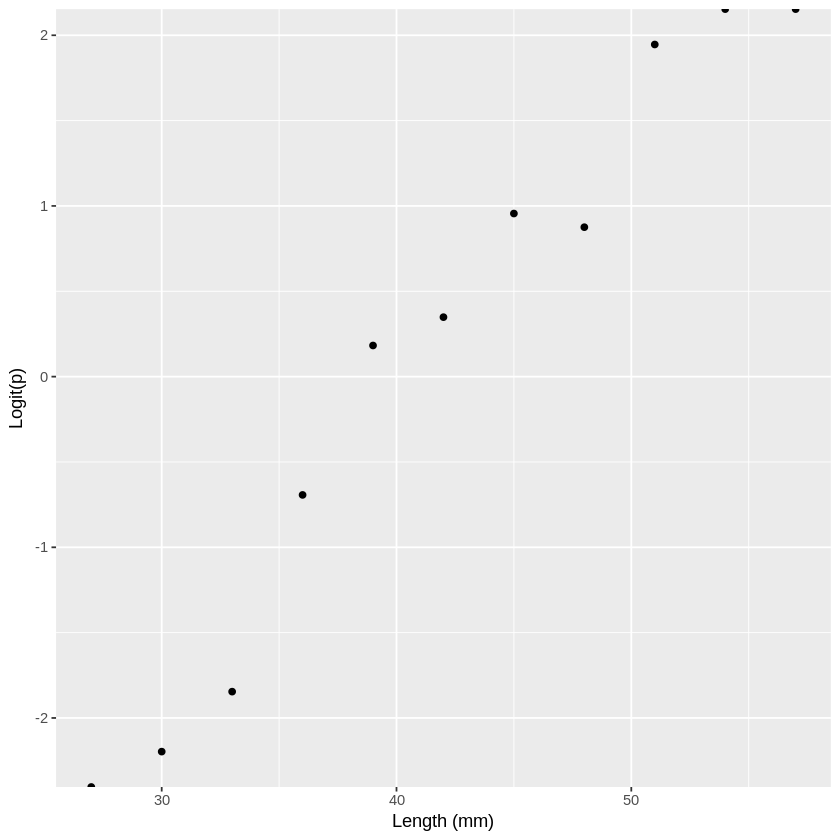

In [26]:
library(ggplot2)
ggplot(data = logits) +
  geom_point(aes(x = length.mm, y = logit)) +
  ylab('Logit(p)') + xlab('Length (mm)')

This looks like a pretty linear relationship, but suppose we went ahead and fit a 2nd-degree polynomial model of the form:

$$logit(p) = \beta_0 + \beta_1 X + \beta_2 X^2$$

In [27]:
quadratic.length.fit <- glm(survival ~ poly(length.mm, 2), data = lobsters, family=binomial)

In [28]:
summary(quadratic.length.fit)


Call:
glm(formula = survival ~ poly(length.mm, 2), family = binomial, 
    data = lobsters)

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -0.06439    0.20131  -0.320    0.749    
poly(length.mm, 2)1 16.79619    2.91753   5.757 8.56e-09 ***
poly(length.mm, 2)2 -2.52971    3.13549  -0.807    0.420    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 220.41  on 158  degrees of freedom
Residual deviance: 172.23  on 156  degrees of freedom
AIC: 178.23

Number of Fisher Scoring iterations: 4


Adding the fitted values from both models to the plot:

In [29]:
head(logits)

length.mm,p,logit
<int>,<dbl>,<dbl>
27,0.0000000,-Inf
30,0.1000000,-2.1972246
33,0.1363636,-1.8458267
36,0.3333333,-0.6931472
39,0.5454545,0.1823216
42,0.5862069,0.3483067


In [30]:
logits$fitted.logit.linear <- predict(logistic.length.fit, newdata = logits)
logits$fitted.logit.quadratic <- predict(quadratic.length.fit, newdata = logits)

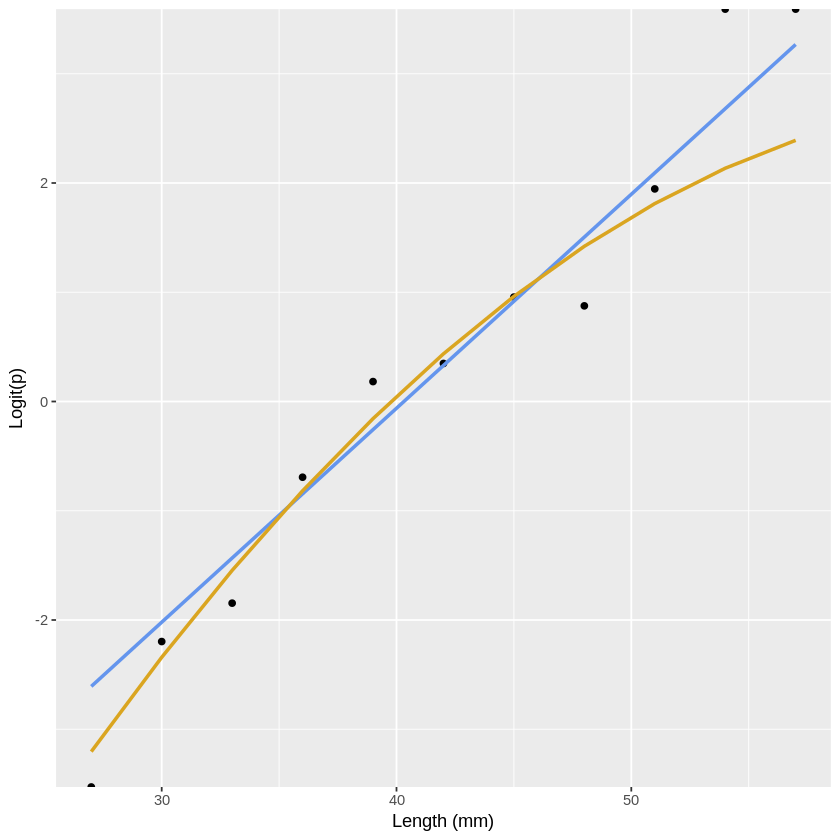

In [31]:
library(ggplot2)
ggplot(data = logits) +
  geom_point(aes(x = length.mm, y = logit)) +
  geom_line(aes(x = length.mm, y = fitted.logit.linear), col = 'cornflowerblue', linewidth = 1) +
      geom_line(aes(x = length.mm, y = fitted.logit.quadratic), col='goldenrod', linewidth = 1)+
  ylab('Logit(p)') + xlab('Length (mm)')

There does not appear to be much difference between the two fits.

Also note the residual deviances from the two fits:

In [32]:
# Residual deviance from logistic linear:
logistic.length.fit$deviance

[1] 172.8714

In [33]:
# Residual deviance from logistic quadratic:
quadratic.length.fit$deviance

[1] 172.2306

The quadratic term improved the residual deviance, but only very slightly.  Testing whether this improvement is significant

In [34]:
anova(logistic.length.fit, quadratic.length.fit, test = 'Chisq')

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,157,172.8714,NA,NA,NA
2,156,172.2306,1,0.6407803,0.4234284


* Why is the DF = 1? - **This is the difference in number of parameters.**
* Verify the p-value.
* What does this output indicate about the necessity of a quadratic term? - **No evidence to support more complicated, quadratic model(p = 0.42 > 0.05).**

In [35]:
# verify the p-value
1-pchisq(0.6407803, df=1)

[1] 0.4234284